<div style="background-color: #ffffff; color: #333; padding: 15px; border: 1px solid #ddd; border-radius: 8px;">
    <a class="anchor" id="1st-bullet"></a>
    <h2 style="color: #795548; font-weight: bold; text-align: center;">Group Project - Feature Selection</h2>
    <h3 style="color: #a1887f; text-align: center;">Data Mining 2024/2025</h3>
</div>

<div style="text-align: center;">
    <strong>Group 14</strong>
    <table style="margin: 0 auto; border-collapse: collapse; border: 1px solid black;">
        <tr>
            <th style="border: 1px solid white; padding: 8px;">Name</th>
            <th style="border: 1px solid white; padding: 8px;">Student ID</th>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Francisco Santos</td>
            <td style="border: 1px solid white; padding: 8px;">20240562</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Margarida Raposo</td>
            <td style="border: 1px solid white; padding: 8px;">20241020</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Nuno Nunes</td>
            <td style="border: 1px solid white; padding: 8px;">20240560</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Teresa Menezes</td>
            <td style="border: 1px solid white; padding: 8px;">20240333</td>
        </tr>
    </table>
</div>

### **Structure**
1. [Change](#add)
2. [Change](#add)

In [53]:
import pandas as pd
import numpy as np

# import matplotlib.pyplot and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os
from math import ceil

from scipy import stats

# Encoder 
from sklearn.preprocessing import OrdinalEncoder

# Standard scaler
from sklearn.preprocessing import StandardScaler

import warnings

In [54]:
df = pd.read_csv('df2.csv') #, index_col='customer_id'

In [55]:
df.head()

,Unnamed: 0,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,...,total_amount_spent,customer_city,total_orders,days_since_last_order,vendor_loyalty_score,cuisine_variety,available_cuisines_city,relative_cuisine_variety,average_spending,order_frequency
0,0,-1.336914,-0.405124,-0.101535,-0.460631,-1.179582,-2.746186,-0.419982,-0.424012,-0.271954,...,-0.207887,-1.060623,-0.471133,-2.746186,-0.076298,-0.870670,1.151593,-1.080237,0.528089,22.754035
1,1,-1.478066,-0.405124,-0.531991,-0.209876,-1.179582,-2.746186,0.676943,-0.153769,-0.271954,...,-0.415895,1.338483,-0.471133,-2.746186,-0.076298,-0.195411,-1.281334,0.378789,-0.087778,22.754035
2,2,1.486128,-0.765813,-0.531991,-0.209876,-1.179582,-2.746186,0.367203,-0.424012,-0.271954,...,-0.631216,-0.260921,-0.471133,-2.746186,1.472881,-0.870670,0.108910,-0.947598,-0.725299,22.754035
3,3,-0.207697,-0.405124,-0.388506,-0.460631,-1.179582,-2.702571,-0.419982,0.155382,-0.271954,...,-0.150238,-0.260921,-0.471133,-2.702571,-0.076298,-0.195411,0.108910,-0.284404,0.698774,10.938078
4,4,-1.054610,-0.405124,-0.101535,-0.711387,-1.179582,-2.702571,0.826679,1.304442,-0.271954,...,0.363436,-0.260921,-0.471133,-2.702571,-0.076298,-0.195411,0.108910,-0.284404,2.219652,10.938078


In [56]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [57]:
# select columns representing orders per hour (HR_0 to HR_23)
orders_per_hour = df.loc[:, 'HR_0':'HR_23']

# calculate the total number of orders for different times of the day
dawn = sum(df.loc[:, 'HR_0':'HR_6'].sum())  # Sum of orders from 12 AM to 6 AM
morning = sum(df.loc[:, 'HR_7':'HR_12'].sum())  # Sum of orders from 7 AM to 12 PM
afternoon = sum(df.loc[:, 'HR_13':'HR_18'].sum())  # Sum of orders from 1 PM to 6 PM
night = sum(df.loc[:, 'HR_19':'HR_23'].sum())  # Sum of orders from 7 PM to 11 PM

# organize total orders for each time of the day in a list
orders_per_moment_of_day = [dawn, morning, afternoon, night]

# select columns representing orders per day of the week (DOW_0 to DOW_6)
orders_per_dow = df.loc[:, 'DOW_0':'DOW_6']

# calculate the sum of orders for each day of the week
orders_per_dow_sum = orders_per_dow.sum()

# select columns representing the amount spent per cuisine type (CUI_American to CUI_Thai)
amount_spent_per_cuisine = df.loc[:, 'CUI_American':'CUI_Thai']

# calculate the sum of the amount spent for each cuisine type
amount_spent_per_cuisine_sum = amount_spent_per_cuisine.sum()

In [58]:
df.columns

Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
       'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_amount_spent',
       'customer_city', 'total_orders', 'days_since_last_order',
       'vendor_loyalty_score', 'cuisine_variety', 'available_cuisines_city',
       'relative_cuisine_variety', 'average_spending', 'order_frequency'],
      dtype='object')

**<span style="color: red;">Why are we loosing features?</span>**

# Correlation Matrix

In [59]:
columns_to_drop = list(orders_per_hour.columns) + list(orders_per_dow.columns) + list(amount_spent_per_cuisine.columns)
df_corr = df.drop(columns_to_drop, axis=1)

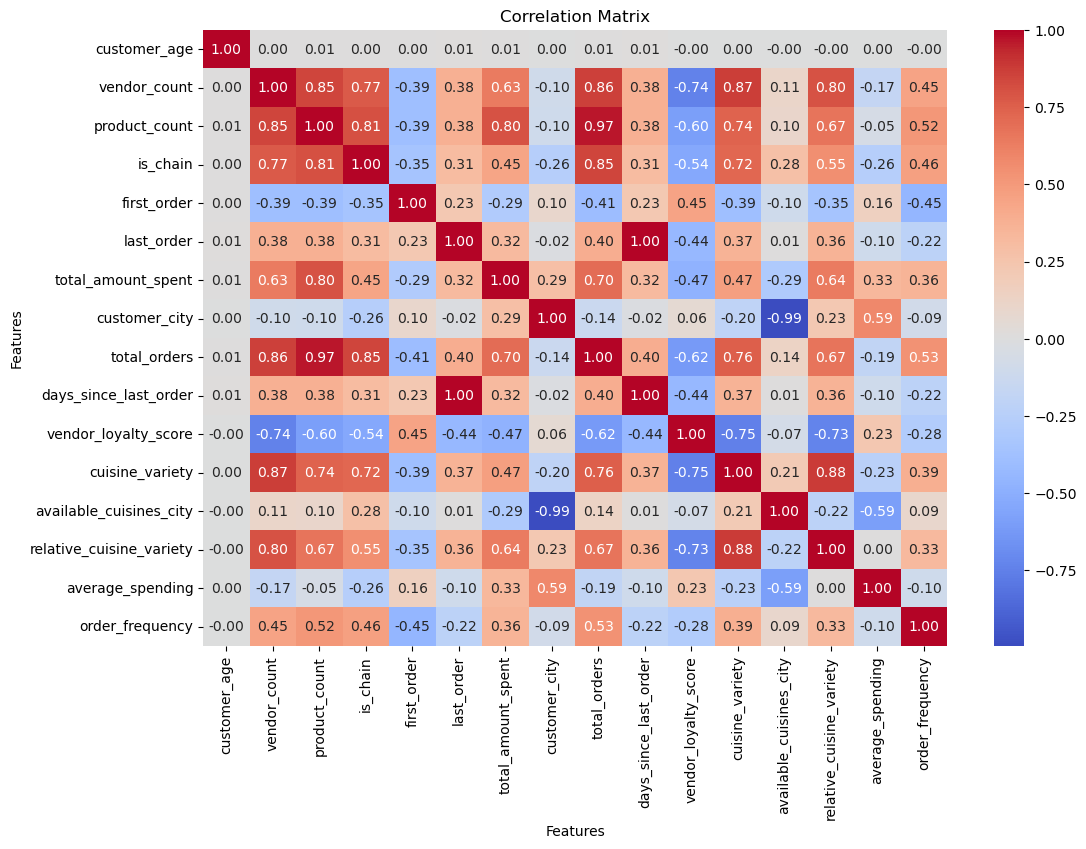

In [60]:
correlation_matrix = df_corr.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

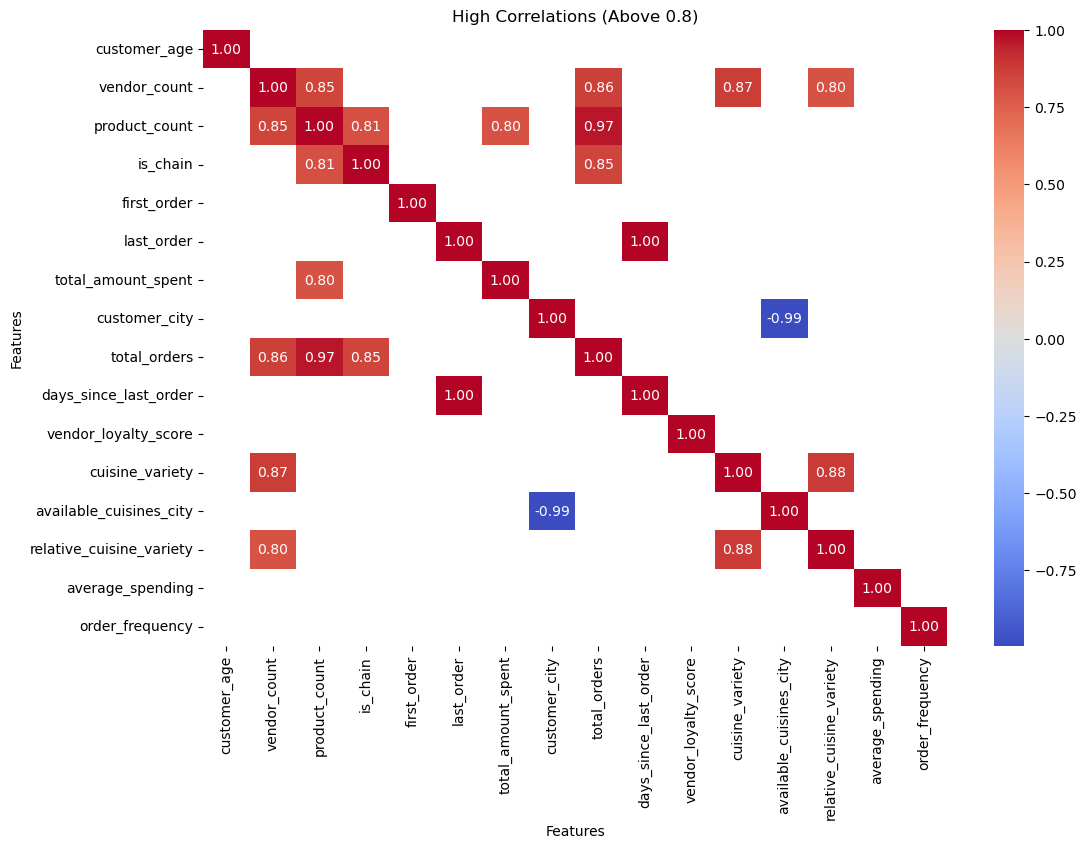

In [63]:
# Compute the correlation matrix
correlation_matrix = df_corr.corr()

# Filter the correlations above 0.8
high_corr_matrix = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with only high correlations
sns.heatmap(high_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=high_corr_matrix.isna())

# Adding titles and labels
plt.title('High Correlations (Above 0.8)')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [64]:
df_corr.drop(['vendor_count', 'product_count', 'is_chain', 'last_order', 'cuisine_variety', 'customer_city'], axis=1, inplace=True)

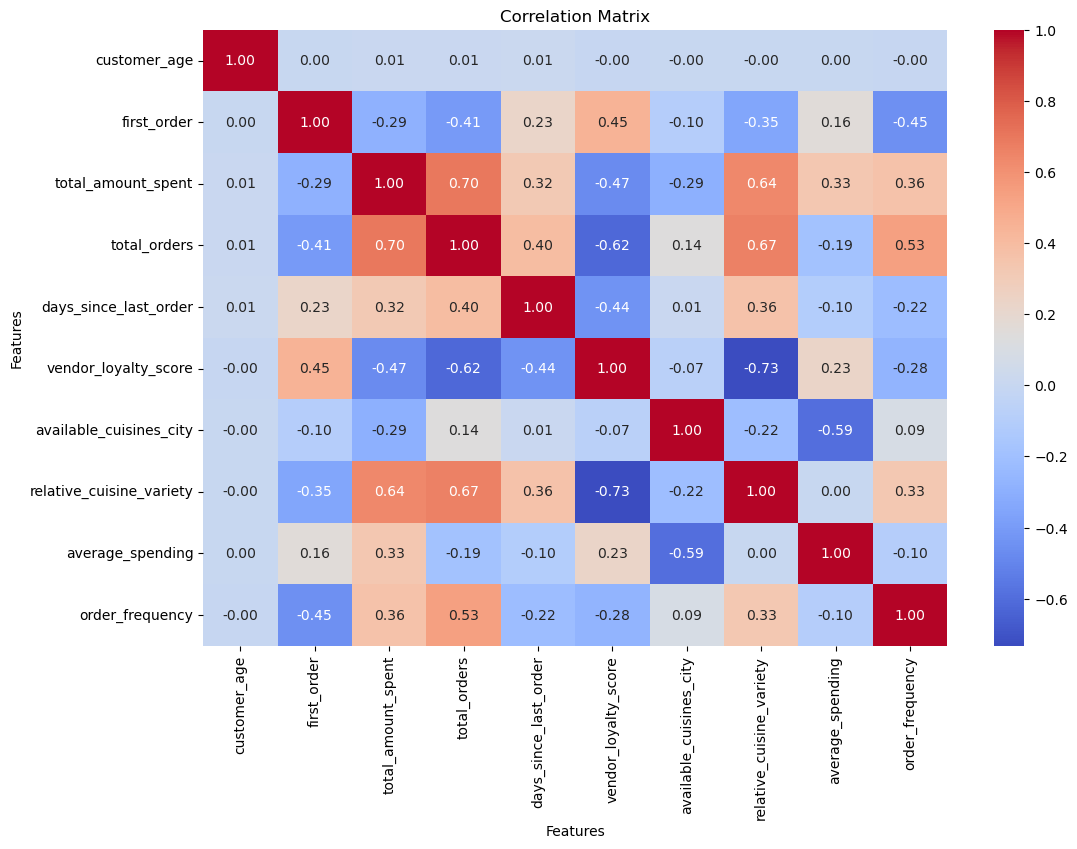

In [66]:
correlation_matrix = df_corr.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Adding titles and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [67]:
df_corr.columns

Index(['customer_age', 'first_order', 'total_amount_spent', 'total_orders',
       'days_since_last_order', 'vendor_loyalty_score',
       'available_cuisines_city', 'relative_cuisine_variety',
       'average_spending', 'order_frequency'],
      dtype='object')

# Perspectives

**Prefences** - vendor_loyalty_score, relative_cuisine_variety, chain_consumption

**Behavioral** - first_order, days_since_last_order, order_frequency, total_orders, total_amount_spent, average_spending